In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering , DBSCAN ,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics , tree
import warnings

In [8]:
df=pd.read_csv('Customer Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [9]:
df.shape

(8950, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
df.drop(columns=['CUST_ID'],inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,4494.44945,201.802084,864.206542,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4494.44945,4103.032597,864.206542,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4494.44945,622.066742,864.206542,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,4494.44945,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,678.334763,864.206542,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,4494.44945,325.594462,864.206542,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,4494.44945,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,4494.44945,81.270775,864.206542,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,4494.44945,52.549959,864.206542,0.250000,6


In [15]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-16-bead8967f88e>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col],ax=ax)


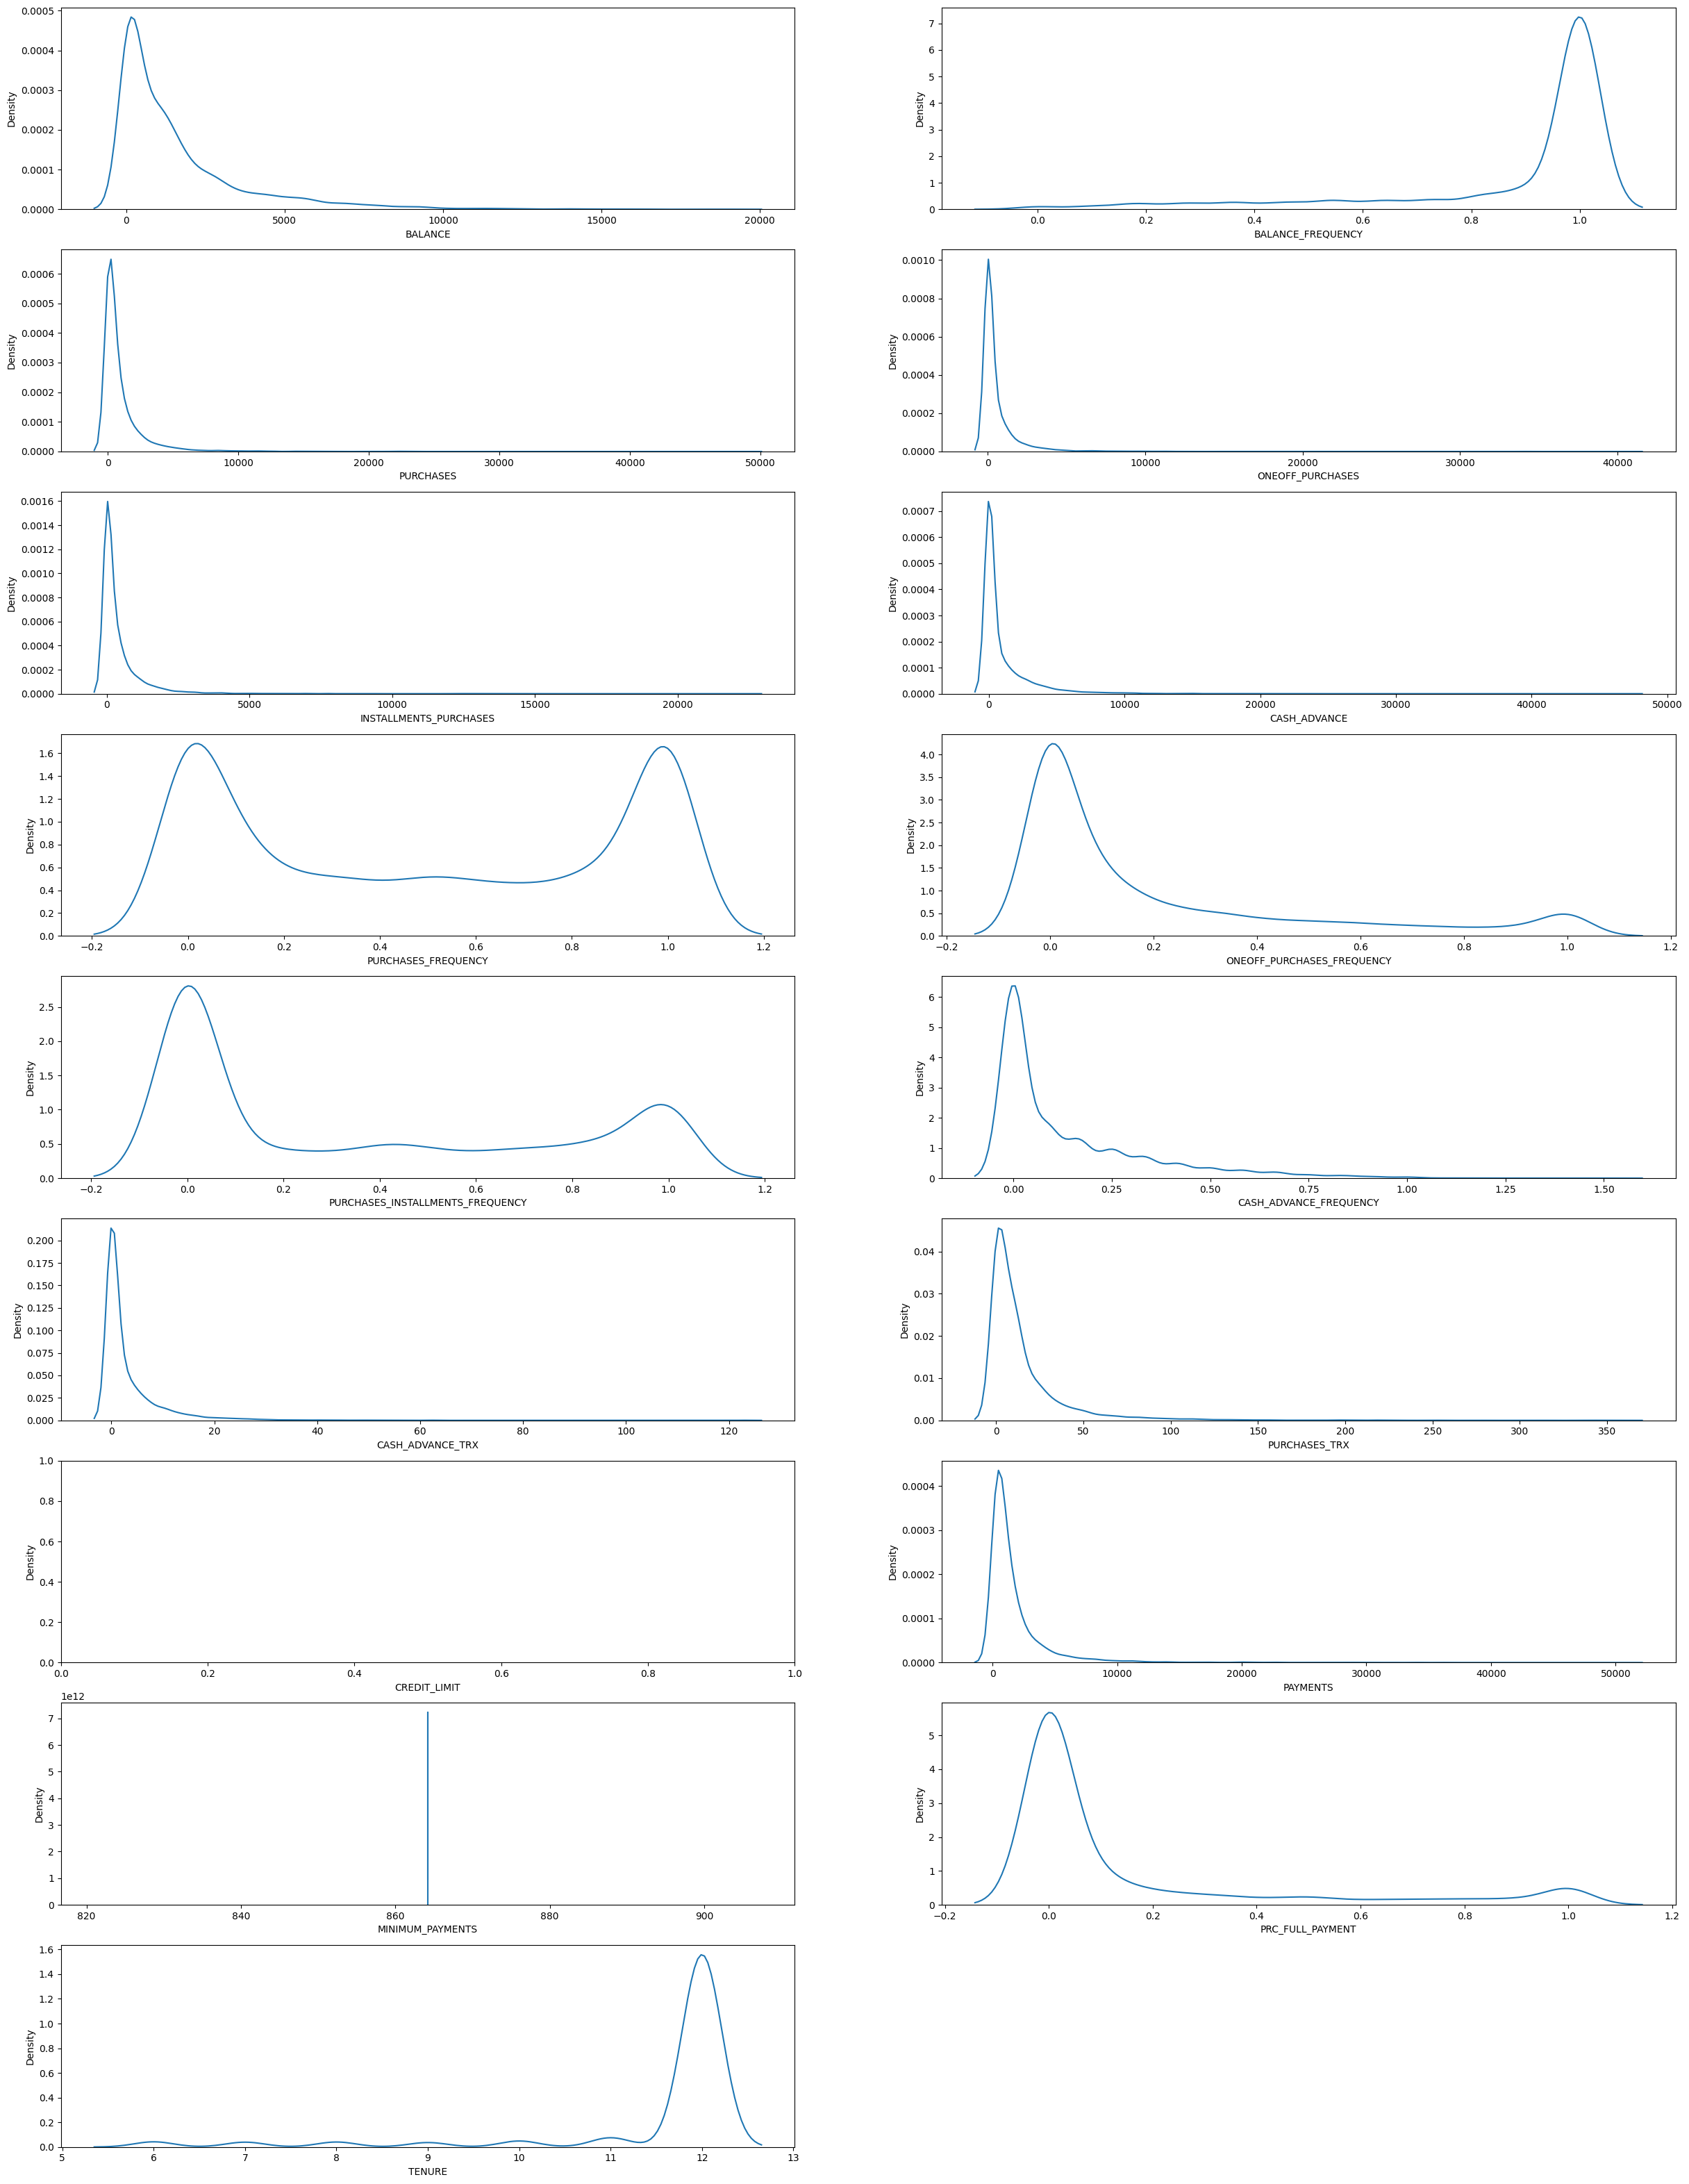

In [16]:
plt.figure(figsize=(30,40))
for i,col in enumerate(df.columns):
  if df[col].dtype!='object':
    ax=plt.subplot(9,2,i+1)
    sns.kdeplot(df[col],ax=ax)
    plt.xlabel(col)

plt.show()

<ipython-input-17-fdd5bfb569cc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw':0.1 ,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-17-fdd5bfb569cc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

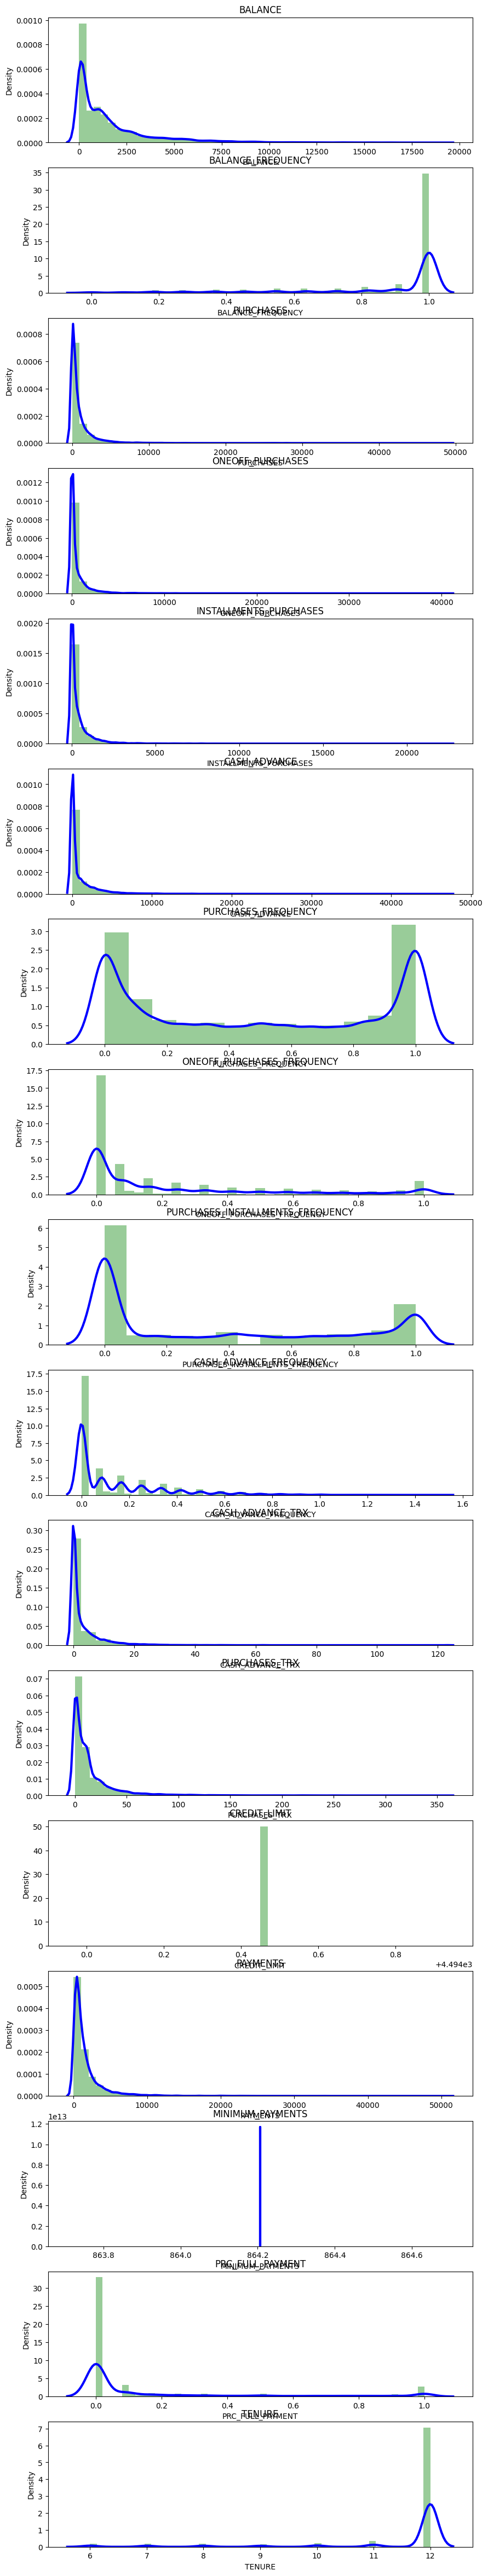

In [17]:
plt.figure(figsize=(10,60))
for i in range (0,17):
  plt.subplot(17,1,i+1)
  sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw':0.1 ,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
  plt.title(df.columns[i])
plt.show()

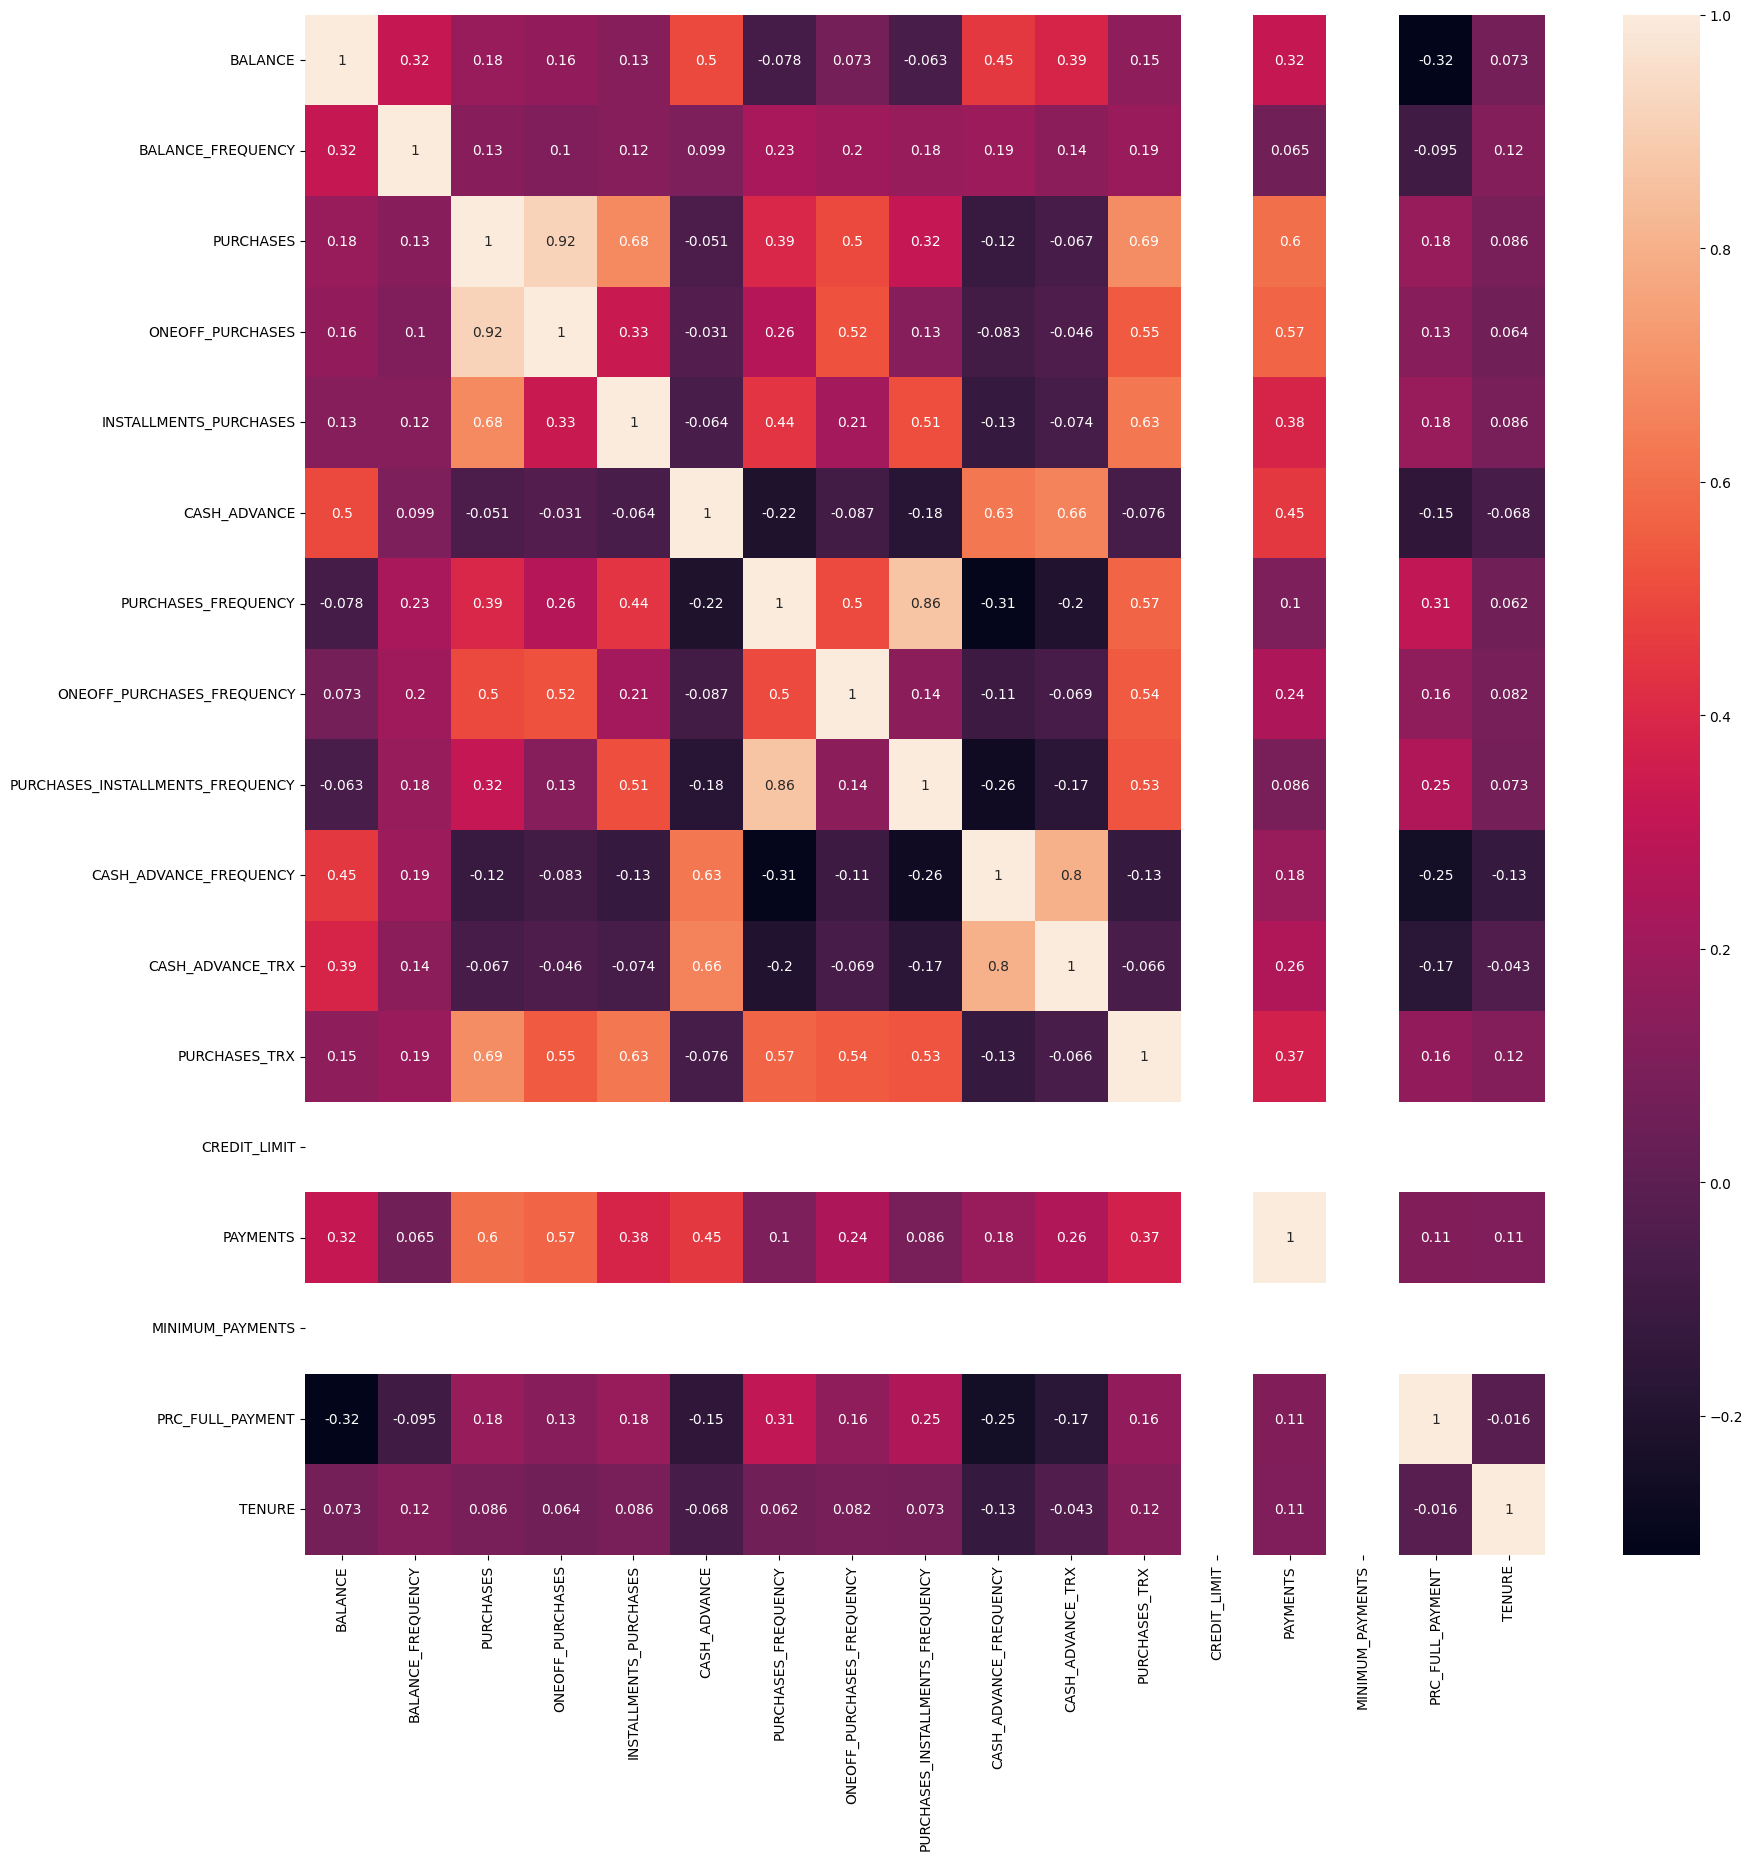

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
scalar=StandardScaler()
scaled_df=scalar.fit_transform(df)

In [20]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(scaled_df)
pca_df =pd.DataFrame(data=principalComponents,columns=['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-1.368546,-1.122516
1,-1.624072,2.133332
2,0.869600,-0.459673
3,-1.047260,-0.393485
4,-1.350652,-0.736016
...,...,...
8945,0.119446,-1.744844
8946,-0.147089,-1.460573
8947,-0.482510,-1.654073
8948,-2.034755,-0.687000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

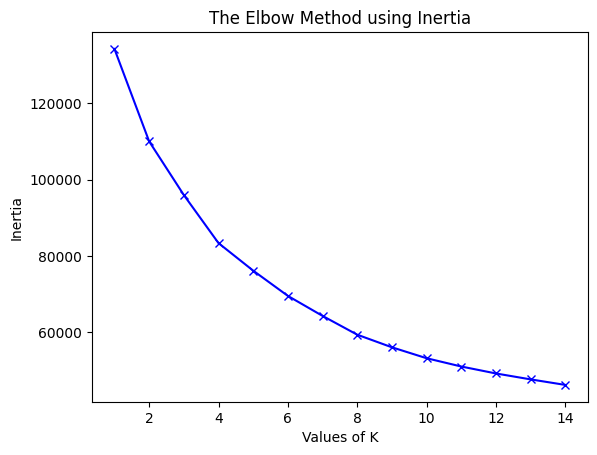

In [21]:
inertia = []
range_val = range(1, 15)

for i in range_val:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmeans.inertia_)

plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


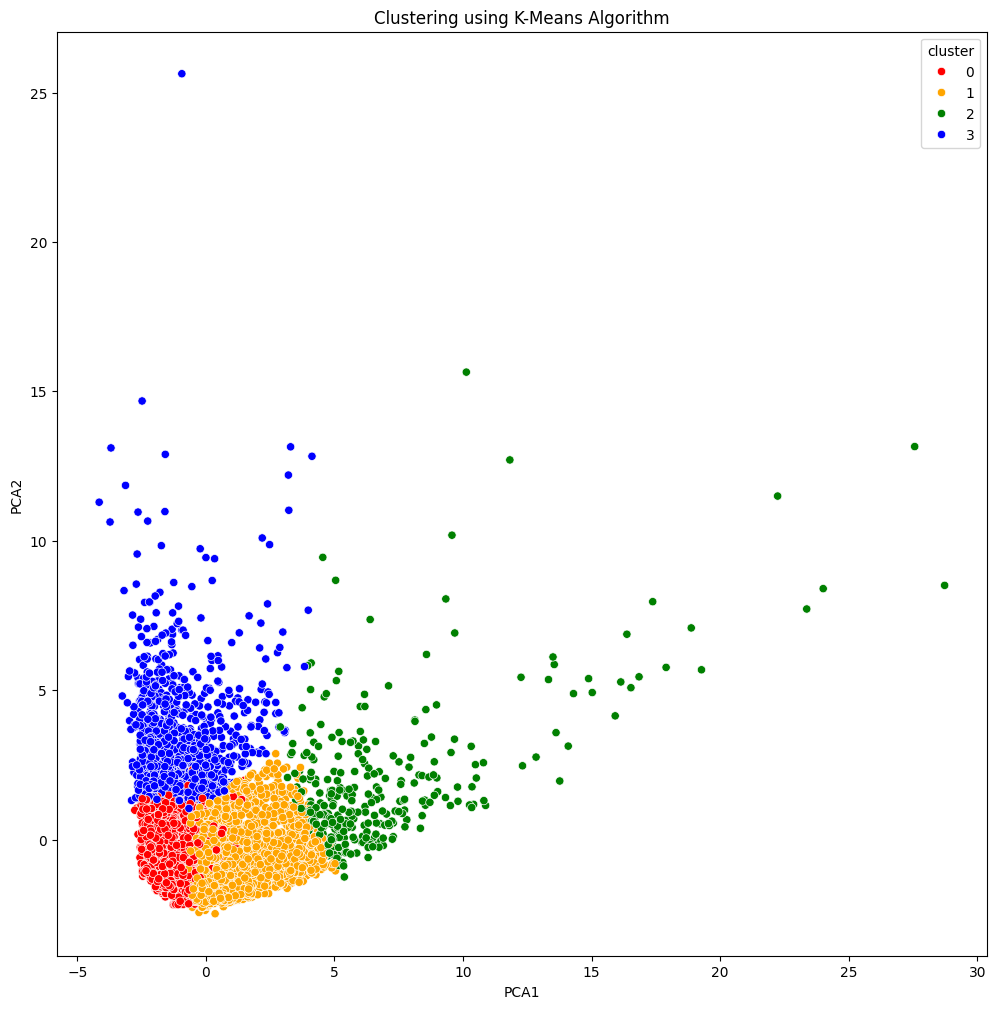

In [22]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans=pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
plt.figure(figsize=(12,12))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df_kmeans,palette=['red','orange','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [23]:
cluster_centers=pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1029.374007,0.785326,283.323698,216.622891,66.967897,550.725295,0.181552,0.088172,0.089592,0.102373,1.846289,3.073208,4494.44945,967.372909,864.206542,0.081685,11.465409
1,1012.645883,0.941656,1342.349528,666.438609,676.181834,232.748893,0.894096,0.313847,0.720471,0.044883,0.833333,23.597711,4494.44945,1427.940231,864.206542,0.266846,11.612383
2,3723.351295,0.986611,8750.705751,5833.170895,2919.451789,797.664793,0.948780,0.743601,0.794888,0.080961,2.559105,98.047923,4494.44945,8397.453158,864.206542,0.303154,11.961661
3,4221.516672,0.966451,429.643915,274.508142,155.216850,4409.000080,0.257513,0.126932,0.160622,0.497852,14.431419,6.640351,4494.44945,3326.560619,864.206542,0.037280,11.312600


In [26]:
cluster_df = pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,4494.44945,201.802084,864.206542,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4494.44945,4103.032597,864.206542,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4494.44945,622.066742,864.206542,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,4494.44945,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,678.334763,864.206542,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,4494.44945,325.594462,864.206542,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,4494.44945,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,4494.44945,81.270775,864.206542,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,4494.44945,52.549959,864.206542,0.250000,6,0


In [27]:
cluster_1_df=cluster_df[cluster_df['cluster']==0]
cluster_2_df=cluster_df[cluster_df['cluster']==1]
cluster_3_df=cluster_df[cluster_df['cluster']==2]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,4494.44945,201.802084,864.206542,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,4494.44945,0.000000,864.206542,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,678.334763,864.206542,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,4494.44945,688.278568,864.206542,0.00,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,4494.44945,1164.770591,864.206542,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,4494.44945,72.530037,864.206542,0.00,6,0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,4494.44945,58.644883,864.206542,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4494.44945,0.000000,864.206542,0.00,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,4494.44945,52.549959,864.206542,0.25,6,0


In [28]:
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,4494.44945,622.066742,864.206542,0.00,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,4494.44945,1400.057770,864.206542,0.00,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,4494.44945,679.065082,864.206542,0.00,12,1
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,4494.44945,1083.301007,864.206542,0.00,12,1
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,4494.44945,608.263689,864.206542,0.25,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.00,0.833333,0.0,0,6,4494.44945,475.523262,864.206542,1.00,6,1
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.00,0.833333,0.0,0,6,4494.44945,94.488828,864.206542,0.25,6,1
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.00,0.833333,0.0,0,6,4494.44945,325.594462,864.206542,0.50,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.00,0.833333,0.0,0,6,4494.44945,275.861322,864.206542,0.00,6,1


In [29]:
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,4494.44945,6354.314328,864.206542,1.000000,12,2
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,4494.44945,2077.959051,864.206542,0.000000,12,2
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,4494.44945,6409.496345,864.206542,0.000000,12,2
109,6644.201651,1.000000,4478.75,2721.59,1757.16,7205.520805,1.000000,0.916667,1.000000,0.583333,21,64,4494.44945,10857.943210,864.206542,0.083333,12,2
120,8504.876253,1.000000,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.000000,0.500000,10,85,4494.44945,1888.756861,864.206542,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,4494.44945,1650.425296,864.206542,0.000000,12,2
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,4494.44945,1942.074765,864.206542,0.083333,12,2
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,4494.44945,5024.430008,864.206542,0.083333,12,2
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,4494.44945,7966.582037,864.206542,0.777778,12,2


<Axes: xlabel='cluster', ylabel='count'>

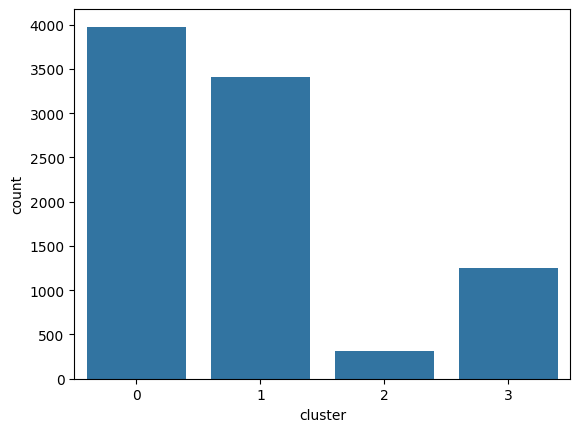

In [30]:
sns.countplot(x='cluster',data=cluster_df)

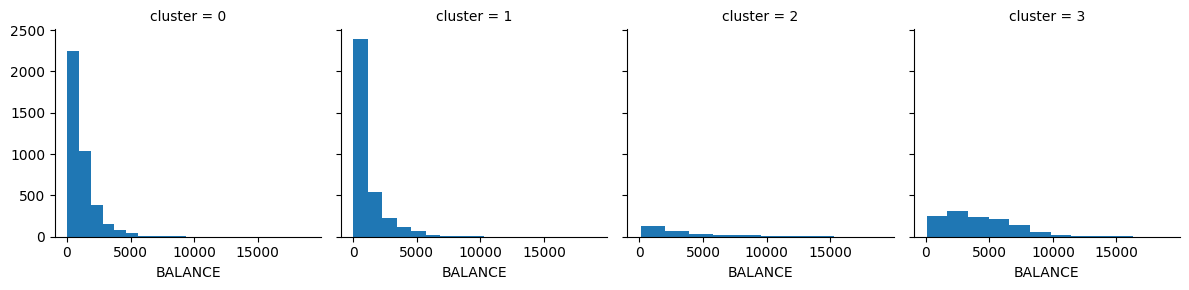

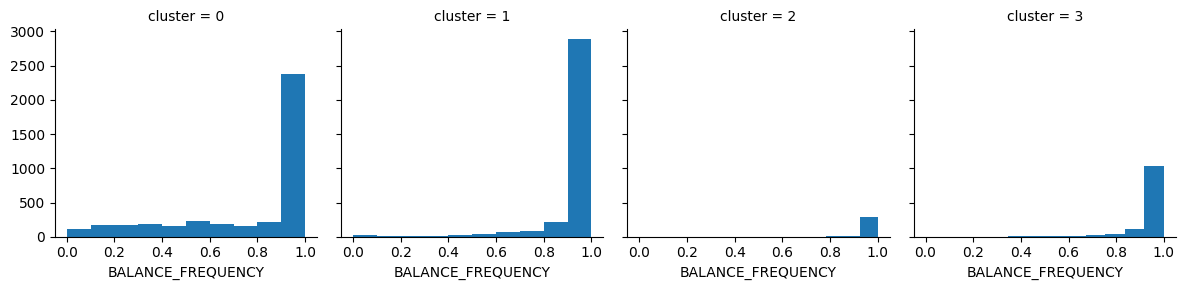

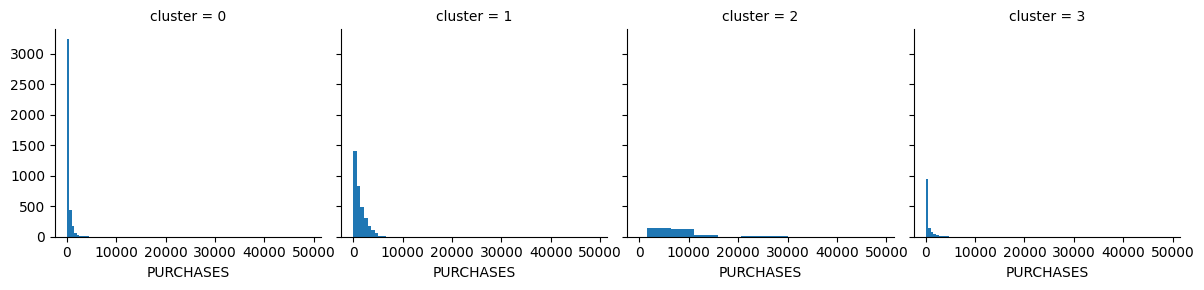

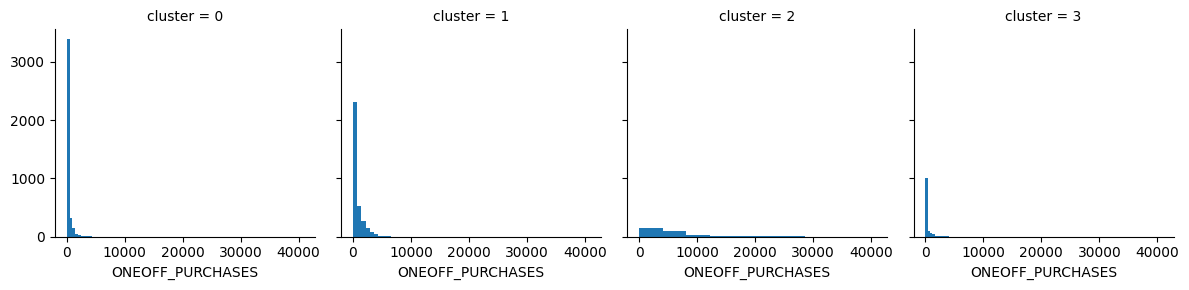

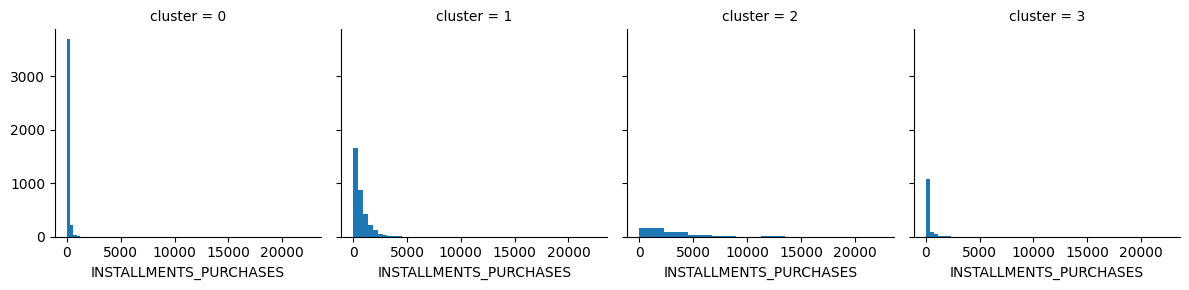

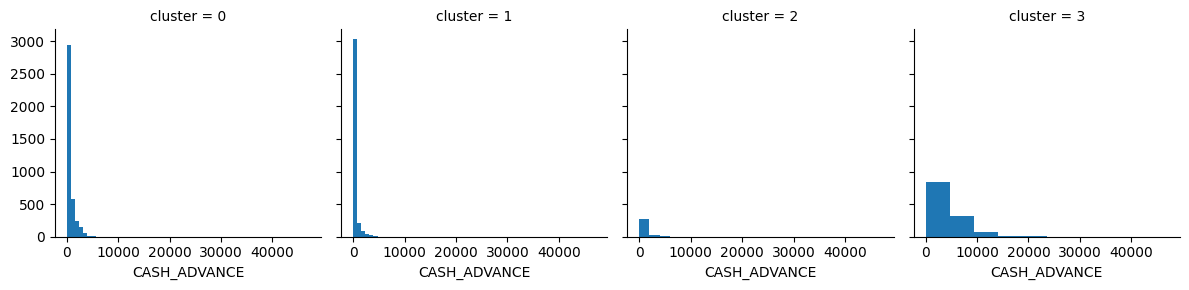

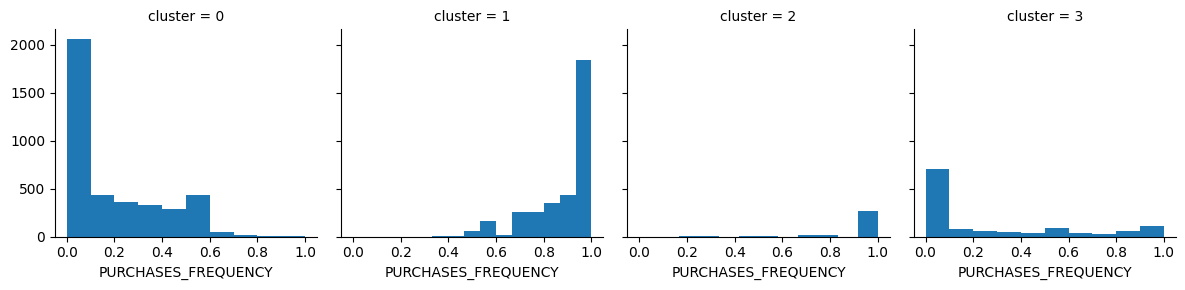

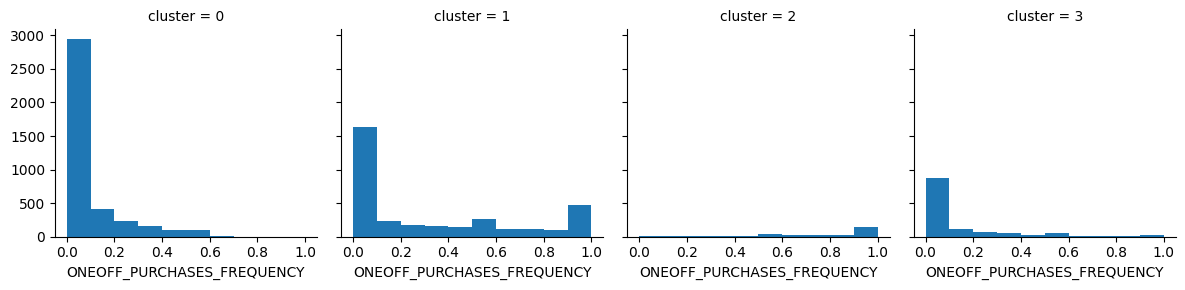

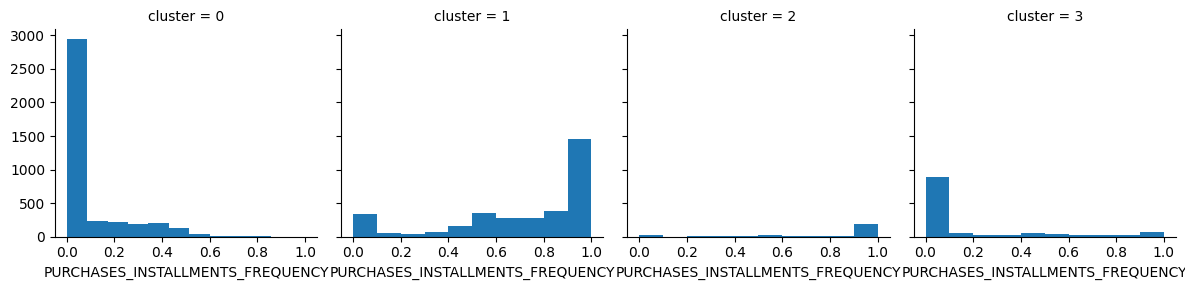

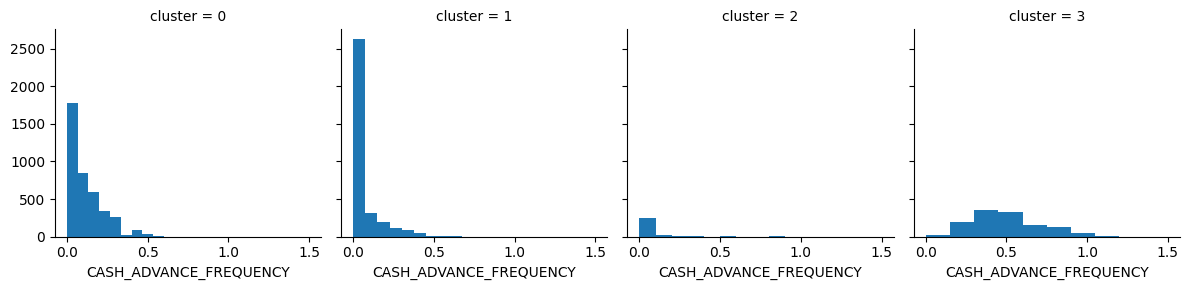

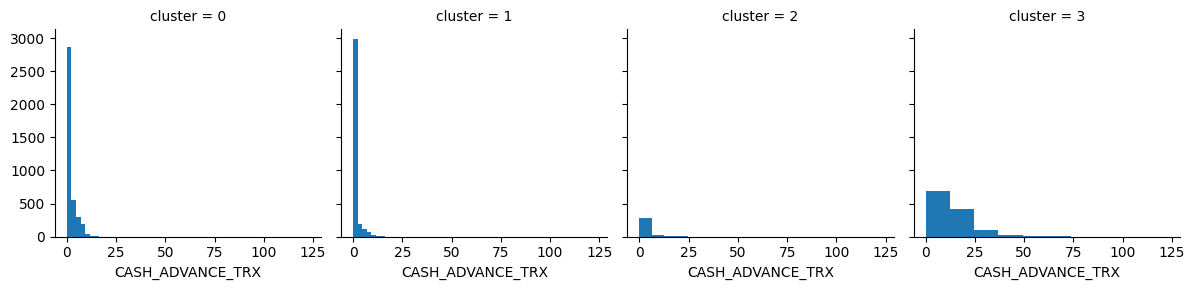

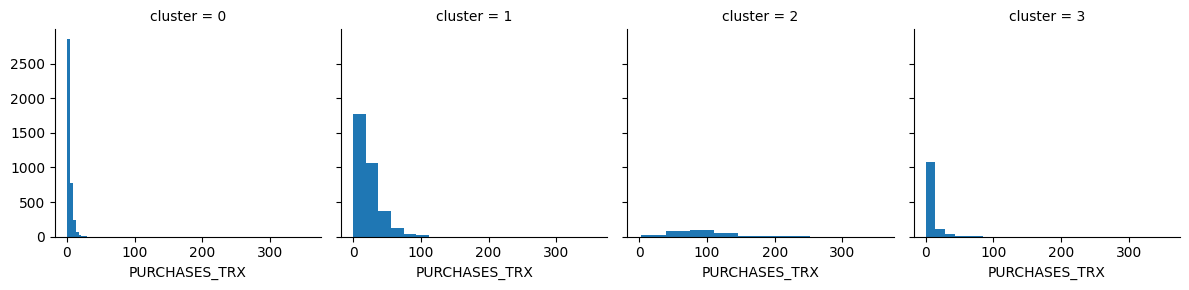

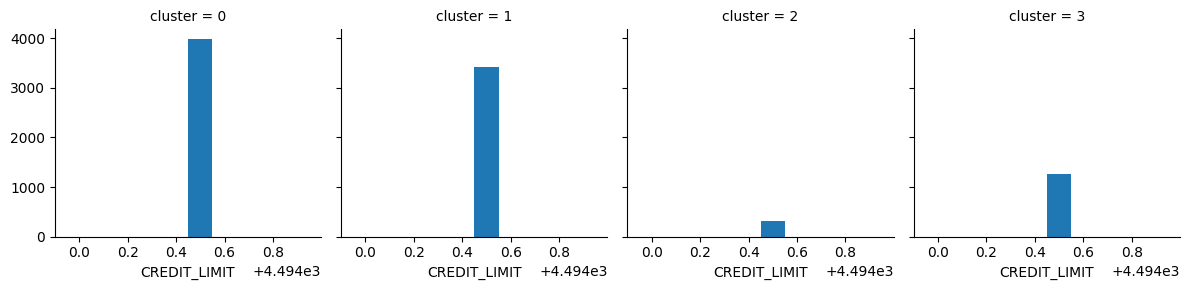

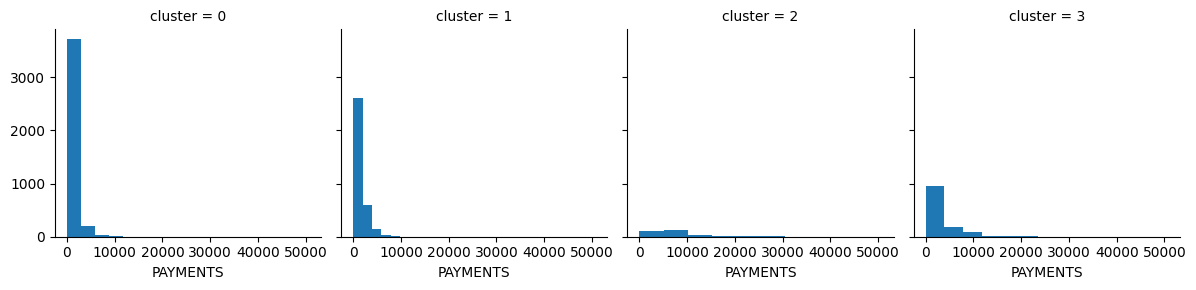

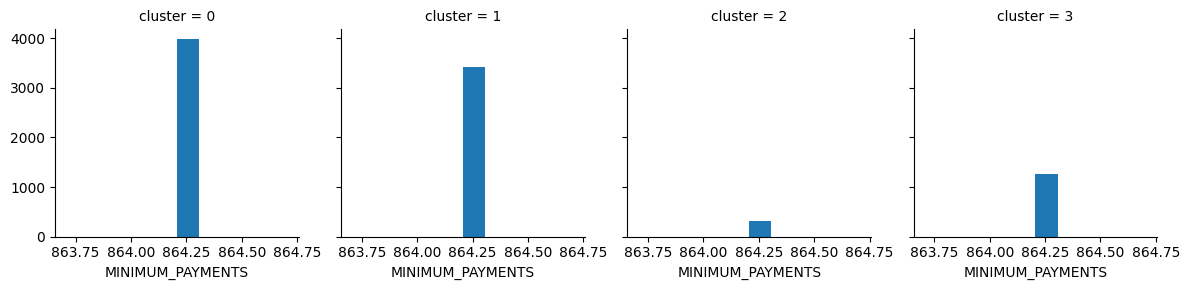

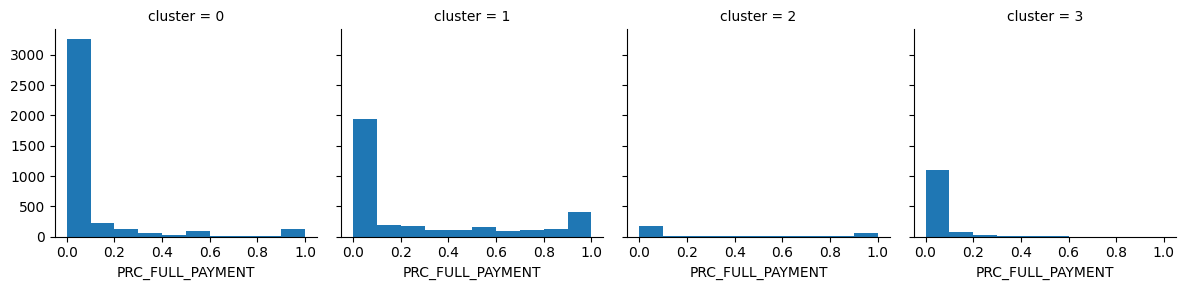

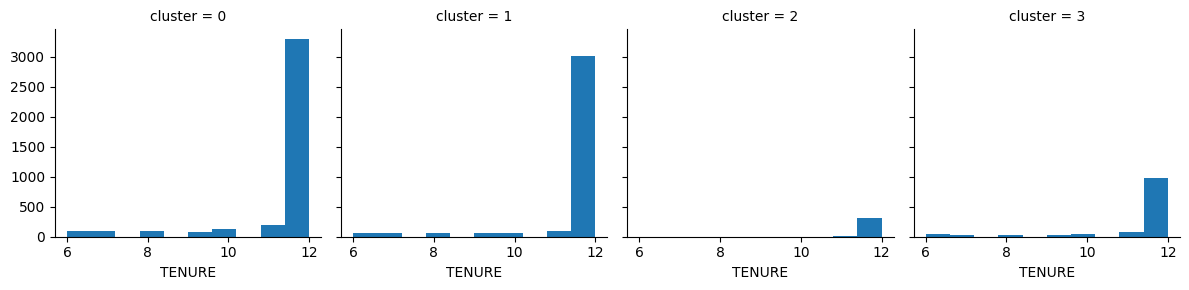

In [31]:
for c in cluster_df.drop(['cluster'],axis=1):
  grid=sns.FacetGrid(cluster_df,col='cluster')
  grid=grid.map(plt.hist,c)
  plt.show()

In [32]:
import joblib
joblib.dump(kmeans_model,'kmeans_model.pkl')

['kmeans_model.pkl']

In [33]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [34]:
X = cluster_df.drop(['cluster'],axis=1)
Y = cluster_df[['cluster']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

In [35]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4100,4433.582508,1.000000,0.00,0.00,0.00,1434.153185,0.000000,0.00,0.000000,0.416667,9,0,4494.44945,6801.553821,864.206542,0.083333,12
6894,51.466420,0.181818,0.00,0.00,0.00,469.836414,0.000000,0.00,0.000000,0.083333,1,0,4494.44945,2801.977685,864.206542,1.000000,12
3352,5926.922151,1.000000,2325.75,2325.75,0.00,461.862131,0.500000,0.50,0.000000,0.250000,3,25,4494.44945,1489.518098,864.206542,0.000000,12
3144,429.887213,1.000000,898.34,295.00,603.34,0.000000,0.416667,0.25,0.416667,0.000000,0,11,4494.44945,865.944520,864.206542,0.000000,12
6456,126.622651,0.375000,1015.30,1015.30,0.00,0.000000,0.250000,0.25,0.000000,0.000000,0,5,4494.44945,2583.278505,864.206542,1.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,216.595085,1.000000,270.21,270.21,0.00,232.881575,1.000000,1.00,0.000000,0.083333,2,12,4494.44945,453.391188,864.206542,0.000000,12
8486,34.750769,1.000000,2562.00,0.00,2562.00,0.000000,1.000000,0.00,1.000000,0.000000,0,12,4494.44945,2544.223939,864.206542,0.454545,12
4878,8.523984,0.363636,130.32,0.00,130.32,0.000000,0.166667,0.00,0.083333,0.000000,0,2,4494.44945,64.345690,864.206542,0.000000,12
467,52.229659,1.000000,565.50,0.00,565.50,101.137379,1.000000,0.00,1.000000,0.083333,1,14,4494.44945,2768.795805,864.206542,0.250000,12


In [36]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6301,162.293507,1.000000,0.00,0.00,0.00,428.185827,0.000000,0.000000,0.000000,0.250000,5,0,4494.44945,90.933457,864.206542,0.000000,12
1784,6224.464489,1.000000,4439.11,3884.10,555.01,0.000000,0.833333,0.500000,0.750000,0.000000,0,59,4494.44945,2546.344149,864.206542,0.000000,12
8633,942.329974,1.000000,450.00,450.00,0.00,722.690339,0.166667,0.166667,0.000000,0.166667,2,3,4494.44945,281.028562,864.206542,0.000000,6
8108,121.446047,0.909091,1254.46,910.46,344.00,0.000000,0.583333,0.416667,0.416667,0.000000,0,14,4494.44945,1244.737859,864.206542,0.500000,12
7752,13.353513,0.636364,717.95,717.95,0.00,0.000000,0.636364,0.636364,0.000000,0.000000,0,14,4494.44945,864.238423,864.206542,0.750000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,1421.169324,1.000000,0.00,0.00,0.00,37.440222,0.000000,0.000000,0.000000,0.200000,2,0,4494.44945,224.088112,864.206542,0.000000,10
712,446.735142,1.000000,5228.36,2337.44,2890.92,0.000000,1.000000,1.000000,1.000000,0.000000,0,71,4494.44945,4843.737867,864.206542,0.454545,12
3169,1328.569532,1.000000,140.00,140.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,326.461136,864.206542,0.000000,12
6851,5899.427294,1.000000,0.00,0.00,0.00,2845.745739,0.000000,0.000000,0.000000,0.416667,7,0,4494.44945,2760.879055,864.206542,0.000000,12


In [37]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)


In [38]:
print(metrics.confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[1494   32    0   27]
 [  36 1318    9   18]
 [   1   17  104    4]
 [  39    9    2  470]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1553
           1       0.96      0.95      0.96      1381
           2       0.90      0.83      0.86       126
           3       0.91      0.90      0.90       520

    accuracy                           0.95      3580
   macro avg       0.93      0.91      0.92      3580
weighted avg       0.95      0.95      0.95      3580



In [40]:
import pickle
filename='Final_model.sav'
pickle.dump(model,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,Y_test)
print(f"Accuracy in the Result is : {result*100}")

Accuracy in the Result is : 94.58100558659218
